In [1]:
import numpy as np

In [4]:
# Word-level one-hot encoding (toy example)

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
max_length = 10
results = np.zeros(shape=(len(samples),
    max_length,
    max(token_index.values()) + 1))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [5]:
# Character-level one-hot encoding (toy example)

import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [6]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 9 unique tokens.


In [8]:
# hashing trick
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [9]:
#instantiating an Embedding layer

from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

In [11]:
from keras.datasets import imdb
from keras import preprocessing
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [12]:
#using an Embedding layer and classifer on the IMDB data

from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


/Users/DavidAarhus/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 110us/step - loss: 0.6789 - acc: 0.5881 - val_loss: 0.6484 - val_acc: 0.6646
Epoch 2/10
20000/20000 [==============================] - 2s 81us/step - loss: 0.5785 - acc: 0.7374 - val_loss: 0.5541 - val_acc: 0.7178
Epoch 3/10
20000/20000 [==============================] - 2s 86us/step - loss: 0.4825 - acc: 0.7820 - val_loss: 0.5157 - val_acc: 0.7310
Epoch 4/10
20000/20000 [==============================] - 2s 120us/step - loss: 0.4292 - acc: 0.8093 - val_loss: 0.5056 - val_acc: 0.7432
Epoch 5/10
20000/20000 [==============================] - 2s 110us/step - loss: 0.3931 - acc: 0.8290 - val_loss: 0.5038 - val_acc: 0.7454
Epoch 6/10
20000/20000 [==============================] - 2s 80us/step - loss: 0.3639 - acc: 0.8450 - val_loss: 0.5094 - val_acc: 0.7486
Epoch 7/10
20000/20000 [==============================] - 2s 89us/step - loss: 0.3387 - acc: 0.8577 - val_loss: 0.5160 - val_a

In [15]:
import os
imdb_dir = '/Users/Davidaarhus/Documents/CPSC_393/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [16]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [17]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [18]:
glove_dir = '/Users/Davidaarhus/Documents/CPSC_393/glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [19]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [20]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [22]:
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])
history = model.fit(x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 7ms/step - loss: 2.2340 - acc: 0.4450 - val_loss: 1.2586 - val_acc: 0.5013
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 0.8543 - acc: 0.6400 - val_loss: 0.6984 - val_acc: 0.5550
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 0.3253 - acc: 0.8950 - val_loss: 1.5062 - val_acc: 0.4989
Epoch 4/10
200/200 [==============================] - 1s 6ms/step - loss: 0.4050 - acc: 0.8250 - val_loss: 0.7452 - val_acc: 0.5474
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 0.1692 - acc: 0.9700 - val_loss: 0.7161 - val_acc: 0.5695
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 0.1182 - acc: 0.9650 - val_loss: 1.0042 - val_acc: 0.5189
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0794 - acc: 0.9900 - val_loss: 0.7931 - val_acc: 0.5678
Epoch 8/10
200/200 [========

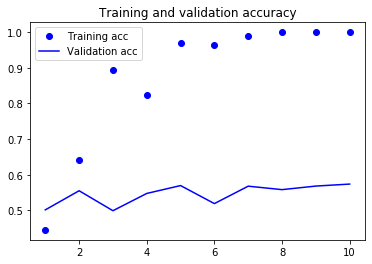

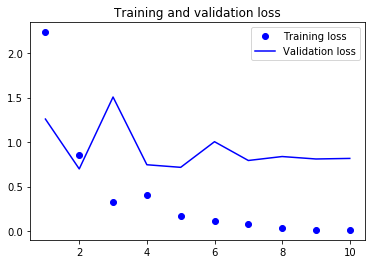

In [24]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
# training the same model without pretrained word embeddings

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])
history = model.fit(x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


/Users/DavidAarhus/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 8ms/step - loss: 0.6937 - acc: 0.4850 - val_loss: 0.6921 - val_acc: 0.5215
Epoch 2/10
200/200 [==============================] - 1s 7ms/step - loss: 0.4932 - acc: 0.9750 - val_loss: 0.7108 - val_acc: 0.5039
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 0.2933 - acc: 0.9800 - val_loss: 0.7060 - val_acc: 0.5097
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.1326 - acc: 0.9950 - val_loss: 0.7030 - val_acc: 0.5221
Epoch 5/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0649 - acc: 1.0000 - val_loss: 0.7068 - val_acc: 0.5210
Epoch 6/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0349 - acc: 1.0000 - val_loss: 0.7128 - val_acc: 0.5213
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0187 - acc: 1.0000 - val_loss: 0.7188 - val_acc: 0.5204
Epoch 8/10
200/200 [========

In [26]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [27]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 69us/step


[0.8144763021850586, 0.5783200263977051]